## Libraries 

In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(16,10))

In [5]:
import json

In [6]:
from sklearn import preprocessing

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
#!pip install lightgbm
import lightgbm as lgb

In [9]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.models import Model
from pathlib import Path

In [12]:
#!pip install livelossplot

In [13]:
from tensorflow.keras.optimizers import Adam
from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

In [14]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.layers import LeakyReLU

In [15]:
from keras.models import Model

In [16]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.metrics import f1_score

In [19]:
from keras.layers import AveragePooling2D
from tensorflow.keras import regularizers

---------------

## Functions

In [20]:
def checkBalance(dataset,target_name):
    print("=======================================")
    print(f"Target Name : {target_name}")
    print("=======================================")
    print("value count")
    print(dataset[target_name].value_counts())
    print("=======================================")
    sns.histplot(x =target_name,data = dataset)
    plt.show()

In [21]:
def check_unique(dataframe,feature_name,target_name):
    # get a list of the unique values 
    uniqueLst = list(dataframe[feature_name].unique())
    # the length of the unique values 
    uniquelength = len(uniqueLst)
    # count the appenrance of each value in the dataset 
    count = dataframe[feature_name].value_counts()
    sorted_count = count.sort_values() 
    # print some information about the feature 
    print(f"Feature : {feature_name}")
    print(f"Number of unique values : {uniquelength}")
    print("=================================")
    print("(Attack'category,count)")
    print(sorted_count)
    print("=================================")
    #sns.histplot(data=, x=feature_name,hue="label", kde=True)
    sns.displot(x =feature_name,hue=target_name,data = dataframe, kind="kde", multiple="stack")
    plt.show()

In [22]:
def count_number_word(lst_of_lst):
    
    wv_lens =[]

    for x in lst_of_lst:
         wv_lens.append(len(x))

    myset = set(wv_lens)

    counts = [wv_lens.count(x)for x in myset]

    df2 = pd.DataFrame({
        "number of words":list(myset),
        "count":counts
    })
    
    return df2


In [23]:
def padd_zeros(row,n_words):
    # get number of words in this row
    length = len(row)
    # create new list that contain the value of the new length 
    new_lst = []
    
    for i in range(n_words):
        if i < length:
            new_lst.append(row[i])
        else:
    
            listofzeros = [0]*100
            new_lst.append(list(listofzeros))   
        
        
    row = new_lst
    
    return row

In [24]:
def prepare_equalWords_data(data,n_words):
    # create a new data frame 
    nemDF = data.copy()
    # pad zeros 
    nemDF['word_vector'] = nemDF['word_vector'].apply(lambda row: padd_zeros(row,n_words)) 
    # recount again 
    nemDF['word_count']  = nemDF['word_vector'].apply(lambda x: len(x))    
    # encode the label to be 0 and 1 instead 1 and 2 
    nemDF['label']  = nemDF['label'].apply(lambda x: int(x-1))    
    
    return nemDF

In [25]:
def visualize_class(data,y):
    plt.figure(figsize=(20,20))
    
    s= [v== y for v in data['label']]
    idxs = np.flatnonzero(s)
    idxs = np.random.choice(idxs, 5, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(1,5, i+1)
        plt.imshow(data['word_vector'][idx])
        plt.axis('off')
        plt.title(y)
    plt.show()
            
def visualize_classes(data,classes):
    for y in classes:
        visualize_class(data,y)
    

In [26]:
def normalize_lst(a):
    lst = np.array(a).reshape(-1,1)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    normalizedlist=scaler.fit_transform(lst)
    return normalizedlist

In [27]:
def get_words(data_frame,n_words):    
    new_x=[]

    for i in range(len(data_frame)):
            templist= np.array([]) 
            np_word = np.array(data_frame['word_vector'][i])
            templist= np.append(templist,np_word[:n_words])
            
            if(np_word.shape[0] <  n_words):
                numeToAdd = n_words - np_word.shape[0]
                templist= np.append(templist, np.zeros(100*numeToAdd))
            
            templist=templist.tolist()
            new_x.append(templist) 

    return new_x

In [28]:
import keras.backend as K
def F1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

--------------

### Models 

In [74]:
# dicision_tree
decTree_CLF = DecisionTreeClassifier(random_state=0)
# XG_boost
xgb_CLF = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
# random_forest
rf_CLF = RandomForestClassifier(n_estimators=100, random_state=0)
# AdaBoost
ada_CLF = AdaBoostClassifier(n_estimators=100,random_state=0)
# HistGradientBoostingClassifier
gradiant_boost_CLF =  HistGradientBoostingClassifier(random_state=0)
# CatBoostClassifier
catBoost_CLF = CatBoostClassifier(random_state=0)
# LGBMClassifier
lightGBM_CLF = lgb.LGBMClassifier(random_state=0)

--------

### read the data 

In [ ]:
data5_2 = pd.read_csv("/kaggle/input/debi-ai-cs-dataset-project/data5.csv")
data5_2['word_vector'] = [json.loads(x) for x in data5_2['word_vector']] # list of lists 

In [ ]:
data5_2.head()

,Unnamed: 0,category,word_vector,label,word_count
0,0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,5
1,1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,5
2,2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,5
3,3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,5
4,4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,5


### make each row as only one list instead of list of lists 

In [ ]:
X_oneLstPerRow = get_words(data5_2,5)

In [ ]:
len(X_oneLstPerRow)

123040

### split the data 

In [ ]:
y = data5_2['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_oneLstPerRow, y, test_size=0.2,stratify=y, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train, random_state=1) 

In [ ]:
pd.DataFrame(y_train).value_counts()

label
0        36912
1        36912
dtype: int64

In [ ]:
pd.DataFrame(y_val).value_counts()

label
0        12304
1        12304
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

label
0        12304
1        12304
dtype: int64

<h3 style="color:maroon;"> Normalize each word to be in 0 to 1 scale </h3>

In [ ]:
#lst = np.array().reshape(-1,1)

scaler  = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [ ]:
X_train.shape

(73824, 500)

### Reshape the data so it can be used as images 

In [ ]:
X_train_reshaped =np.array([*X_train]).reshape(len(X_train),5,100,1)
X_val_reshaped   =np.array([*X_val]).reshape(len(X_val),5,100,1)
X_test_reshaped  =np.array([*X_test]).reshape(len(X_test),5,100,1)

In [ ]:
X_train_reshaped[0].shape

(5, 100, 1)

In [ ]:
X_val_reshaped[0].shape

(5, 100, 1)

In [ ]:
X_test_reshaped[0].shape

(5, 100, 1)

--------

<h2 style="color:rgb(74, 70, 11);">Part 2</h2>

<h3 style="color:maroon;">Use CNN as a feature extractor and XGBoost as a classifier </h3>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
y_train2 = np.array(y_train.values.tolist())

In [ ]:
y_val2 = np.array(y_val.values.tolist())

In [ ]:
y_test2 = np.array(y_test.values.tolist())

### Build the architecture 

In [ ]:
model_5 = Sequential()

# input: 5*100 images with 1 channels -> (5, 100, 1) tensors.

# this applies 32 convolution filters of size 3x3 each.
model_5.add(Conv2D(64, (3, 3), activation='relu', input_shape=(5, 100, 1),padding='same', name='my_layer_1') )
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_5.add(Conv2D(64, (3, 3), activation='relu',padding='same', name='my_layer_2') )
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_5.add(Conv2D(64, (3, 3), activation='relu',padding='same', name='my_layer_3') )
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_5.add(Dropout(0.25))

model_5.add(Conv2D(256, kernel_size=5, activation='relu',padding='same', name='my_layer_4') )
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_5.add(Conv2D(256, kernel_size=5, activation='relu',padding='same', name='my_layer_5') )
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_5.add(LeakyReLU(alpha=0.1))

model_5.add(AveragePooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))

model_5.add(Flatten(name='my_layer_6'))

#model = keras.applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (28,28,1))
model_5.add(Dense(256, activation='relu' , name='my_layer_7') )
model_5.add(Dense(128, activation='relu' , name='my_layer_8') )
model_5.add(Dense(units=1024,activation='relu',
        kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-4) ,name='my_layer_9'))

model_5.add(Dense(1, activation='sigmoid' ,name='my_layer_10'))

model_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_1 (Conv2D)          (None, 5, 100, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 100, 64)        256       
_________________________________________________________________
my_layer_2 (Conv2D)          (None, 5, 100, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 100, 64)        256       
_________________________________________________________________
my_layer_3 (Conv2D)          (None, 5, 100, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 100, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 5, 100, 64)        0

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1)

In [ ]:
plot_loss_3 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_3 = ModelCheckpoint(filepath='tl_model_5_cnnxgboost.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')



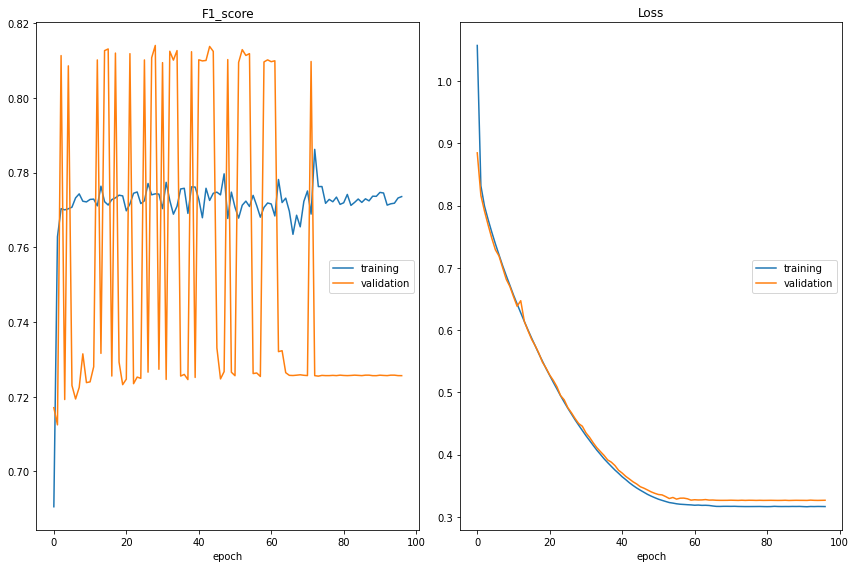

F1_score
	training         	 (min:    0.691, max:    0.786, cur:    0.774)
	validation       	 (min:    0.712, max:    0.814, cur:    0.726)
Loss
	training         	 (min:    0.316, max:    1.057, cur:    0.316)
	validation       	 (min:    0.326, max:    0.885, cur:    0.326)


In [ ]:
model_5.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=[F1_score])

history_model_5=model_5.fit(x=X_train_reshaped , y=y_train2 ,batch_size = 64,verbose=1, epochs = 100,validation_data=(X_val_reshaped,y_val2)   , callbacks=[tl_checkpoint_3, early_stop, plot_loss_3,reduce_lr])


In [ ]:
preds_test = model_5.predict(X_test_reshaped)
pred_classes_test = [int(round(i[0])) for i in preds_test]
f1_score_value_test = f1_score(y_test, pred_classes_test)


print(f1_score_value_test)


0.8155147033651706


----------------------

### Get the feature from "my_layer_7" layer and feed it to Xgboost 

In [ ]:
layer_name='my_layer_7'
intermediate_layer_model = Model(inputs=model_5.input,
                                 outputs=model_5.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_1_input (InputLayer [(None, 5, 100, 1)]       0         
_________________________________________________________________
my_layer_1 (Conv2D)          (None, 5, 100, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 100, 64)        256       
_________________________________________________________________
my_layer_2 (Conv2D)          (None, 5, 100, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 100, 64)        256       
_________________________________________________________________
my_layer_3 (Conv2D)          (None, 5, 100, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 100, 64)        256   

In [ ]:
intermediate_output_layer_7 = intermediate_layer_model.predict(X_train_reshaped) 
intermediate_output_layer_7 = pd.DataFrame(data=intermediate_output_layer_7)

In [ ]:
intermediate_test_output_layer_7 = intermediate_layer_model.predict(X_test_reshaped)
intermediate_test_output_layer_7 = pd.DataFrame(data=intermediate_test_output_layer_7)

In [ ]:
xgb_CLF.fit(intermediate_output_layer_7,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
preds_test_layer_7 = xgb_CLF.predict(intermediate_test_output_layer_7)

f1_score_value_test_layer_7 = f1_score(y_test2, preds_test_layer_7)


print(f1_score_value_test_layer_7)

0.7142267189758414


### Get the feature from "my_layer_8" layer and feed it to Xgboost 

In [ ]:
layer_name='my_layer_8'
intermediate_layer_model = Model(inputs=model_5.input,
                                 outputs=model_5.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_1_input (InputLayer [(None, 5, 100, 1)]       0         
_________________________________________________________________
my_layer_1 (Conv2D)          (None, 5, 100, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 100, 64)        256       
_________________________________________________________________
my_layer_2 (Conv2D)          (None, 5, 100, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 100, 64)        256       
_________________________________________________________________
my_layer_3 (Conv2D)          (None, 5, 100, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 100, 64)        256 

In [ ]:
intermediate_output_layer_8 = intermediate_layer_model.predict(X_train_reshaped) 
intermediate_output_layer_8 = pd.DataFrame(data=intermediate_output_layer_8)

In [ ]:
intermediate_test_output_layer_8 = intermediate_layer_model.predict(X_test_reshaped)
intermediate_test_output_layer_8 = pd.DataFrame(data=intermediate_test_output_layer_8)

In [ ]:
xgb_CLF.fit(intermediate_output_layer_8,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
preds_test_layer_8 = xgb_CLF.predict(intermediate_test_output_layer_8)

f1_score_value_test_layer_8 = f1_score(y_test2, preds_test_layer_8)


print(f1_score_value_test_layer_8)

0.7139389557403295


### Get the feature from "my_layer_9" layer and feed it to Xgboost 

In [ ]:
layer_name='my_layer_9'
intermediate_layer_model = Model(inputs=model_5.input,
                                 outputs=model_5.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_1_input (InputLayer [(None, 5, 100, 1)]       0         
_________________________________________________________________
my_layer_1 (Conv2D)          (None, 5, 100, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 100, 64)        256       
_________________________________________________________________
my_layer_2 (Conv2D)          (None, 5, 100, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 100, 64)        256       
_________________________________________________________________
my_layer_3 (Conv2D)          (None, 5, 100, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 100, 64)        256 

In [ ]:
intermediate_output_layer_9 = intermediate_layer_model.predict(X_train_reshaped) 
intermediate_output_layer_9 = pd.DataFrame(data=intermediate_output_layer_9)

In [ ]:
intermediate_test_output_layer_9 = intermediate_layer_model.predict(X_test_reshaped)
intermediate_test_output_layer_9 = pd.DataFrame(data=intermediate_test_output_layer_9)

In [ ]:
xgb_CLF.fit(intermediate_output_layer_9,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
preds_test_layer_9 = xgb_CLF.predict(intermediate_test_output_layer_9)

f1_score_value_test_layer_9 = f1_score(y_test2, preds_test_layer_9)


print(f1_score_value_test_layer_9)

0.7138429752066116


------------------------

### Get the feature from "my_layer_7" layer and feed it to Random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
    
RF_part2 = RandomForestClassifier(max_depth=100, random_state=0)

RandomForestClassifier(max_depth=100, random_state=0)

In [ ]:
RF_part2.fit(intermediate_output_layer_7,y_train2)

RandomForestClassifier(max_depth=100, random_state=0)

In [ ]:
preds_test_layer_7_RF = RF_part2.predict(intermediate_test_output_layer_7 )

f1_score_value_test_layer_7_RF = f1_score(y_test2, preds_test_layer_7_RF)

print(f1_score_value_test_layer_7_RF)

0.7146765783903773


### Get the feature from "my_layer_8" layer and feed it to Random forest 

In [ ]:
RF_part2.fit(intermediate_output_layer_8,y_train2)

RandomForestClassifier(max_depth=100, random_state=0)

In [ ]:
preds_test_layer_8_RF = RF_part2.predict(intermediate_test_output_layer_8 )

f1_score_value_test_layer_8_RF = f1_score(y_test2, preds_test_layer_8_RF)
print(f1_score_value_test_layer_8_RF)

0.7146396861449513


### Get the feature from "my_layer_9" layer and feed it to Random forest 

In [ ]:
RF_part2.fit(intermediate_output_layer_9,y_train2)

RandomForestClassifier(max_depth=100, random_state=0)

In [ ]:
preds_test_layer_9_RF = RF_part2.predict(intermediate_test_output_layer_9 )

f1_score_value_test_layer_9_RF = f1_score(y_test2, preds_test_layer_9_RF)

print(f1_score_value_test_layer_9_RF)

0.713975828943291


-----------

### Compare the results of using the output from different layer in the neural network , with XGBoost classifiers 

In [29]:
xgbScores = [0.7142267189758414,0.7139389557403295,0.7138429752066116]

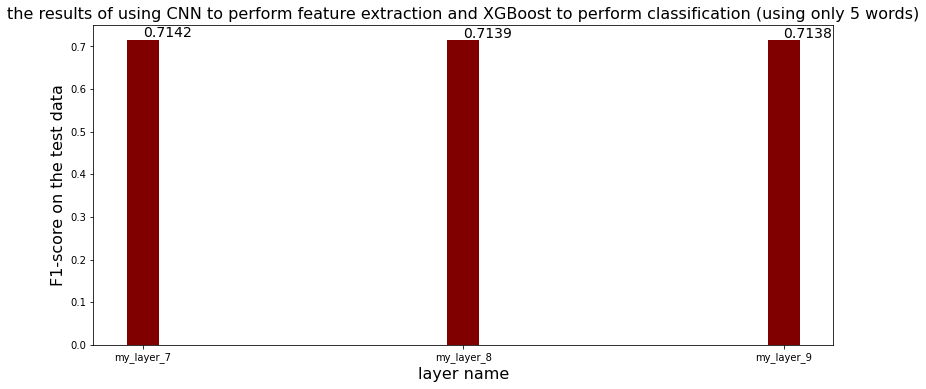

In [72]:
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (11,5))
ax.bar(["my_layer_7","my_layer_8","my_layer_9"],xgbScores,width=0.1,color="maroon")
for index,data in enumerate(xgbScores):
    plt.text(x=index , y =data+.007, s=f"{data:.4f}",fontdict=dict(fontsize=14) )
plt.tight_layout()

plt.xlabel("layer name",fontsize=16)
plt.ylabel("F1-score on the test data",fontsize=16)
plt.title(f"the results of using CNN to perform feature extraction and XGBoost to perform classification (using only 5 words)",fontsize=16)

plt.show()

### Compare the results of using the output from different layer in the neural network , with Random forest  

In [35]:
rfScores = [0.7146765783903773,0.7146396861449513,0.713975828943291]

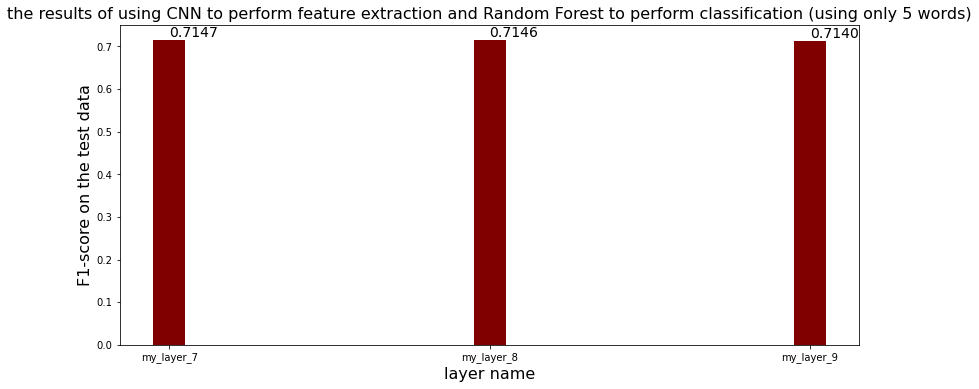

In [73]:
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (11,5))
ax.bar(["my_layer_7","my_layer_8","my_layer_9"],rfScores,width=0.1,color="maroon")
for index,data in enumerate(rfScores):
    plt.text(x=index , y =data+.007, s=f"{data:.4f}",fontdict=dict(fontsize=14) )
plt.tight_layout()

plt.xlabel("layer name",fontsize=16)
plt.ylabel("F1-score on the test data",fontsize=16)
plt.title(f"the results of using CNN to perform feature extraction and Random Forest to perform classification (using only 5 words)",fontsize=16)

plt.show()

## References 

[1] https://www.csmining.org/cdmc2021/index.php?id=5

[2] https://keras.io/api/applications/